In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
!tar xf spark-3.3.2-bin-hadoop2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#from pyspark.sql import SparkSession
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
from pyspark.sql.functions import col

import matplotlib.pyplot as plt
import seaborn as sns 

from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#spark app and read file saved in google drive
#spark = SparkSession.builder.appName('ReadFromGoogleDrive').getOrCreate()
#all_data_new.csv https://drive.google.com/file/d/1fLxiVNkZkr0Hi-tYskxKezGEJW5bLaa7/view?usp=sharing
#file_id = '1iNWfAbYUS3OtBN7M49WHgHVYbG8mrb-g' #  all_data.csv
file_id = '1fLxiVNkZkr0Hi-tYskxKezGEJW5bLaa7' # all_data_new.csv
file = drive.CreateFile({'id': file_id})
file.GetContentFile('all_data_new.csv')

In [ ]:
# glove.840B.300d.gensim.vectors.npy
# https://drive.google.com/file/d/12kuhA6sknWTWJqFwNZykhd7x3x1OyhIb/view?usp=sharing

file_id2 = '12kuhA6sknWTWJqFwNZykhd7x3x1OyhIb'
file2 = drive.CreateFile({'id': file_id2})
file2.GetContentFile('glove.840B.300d.gensim.vectors.npy')

In [ ]:
# glove.840B.300d.gensim
# https://drive.google.com/file/d/1N-XZv5lzoWt3mUz0CVr6YePL6A4sQLFk/view?usp=sharing

file_id3 = '1N-XZv5lzoWt3mUz0CVr6YePL6A4sQLFk'
file3 = drive.CreateFile({'id': file_id3})
file3.GetContentFile('glove.840B.300d.gensim')

In [ ]:
# crawl-300d-2M.gensim.vectors.npy
# https://drive.google.com/file/d/1W4nxpJomRWtx_ghOthBMnxgJj2WMPLqV/view?usp=sharing
#file_id4 = '1W4nxpJomRWtx_ghOthBMnxgJj2WMPLqV'
#file4 = drive.CreateFile({'id': file_id4})
#file4.GetContentFile('crawl-300d-2M.gensim.vectors.npy')

In [ ]:
# crawl-300d-2M.gensim
# https://drive.google.com/file/d/1C9omEQpXJepKMF7wZ9eULs9DLx_DAGyJ/view?usp=sharing

#file_id5 = '1C9omEQpXJepKMF7wZ9eULs9DLx_DAGyJ'
#file5 = drive.CreateFile({'id': file_id5})
#file5.GetContentFile('crawl-300d-2M.gensim')

In [ ]:
sparkdf = spark.read.format("com.dtabricks.spark.csv").option("delimiter",",").option("multiline", "true").option("mode", "DROPMALFORMED").option("header", True).option("inferschema", True).csv("all_data_new.csv")
#sparkdf = spark.read.format("com.dtabricks.spark.csv").option("header", True).csv("all_data.csv")
sparkdf.show()

+--------------------+--------------------+-----+--------------------+--------------+---------+----------+--------+-----+---+---+-----+--------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----+------+-----------+------------+------------+-------------------------+--------+------------------------+---------+------+------+-----+--------+-------+--------------+-----+-----+-----+------+-----------------------+-------------------+-----------------------------------+-----------------------------+----------------+------------------------+------------------------+
|                  id|        comment_text|split|        created_date|publication_id|parent_id|article_id|  rating|funny|wow|sad|likes|disagree|           toxicity|     severe_toxicity|             obscene|     sexual_explicit|     identity_attack|              insult|              threat|male|female|transgender|other_gender|heterose

In [ ]:
sparkdf.describe("split").show()

+-------+--------------------+
|summary|               split|
+-------+--------------------+
|  count|                6359|
|   mean|              1005.5|
| stddev|   1421.991736966147|
|    min|                    |
|    max|” French said."" ...|
+-------+--------------------+



# Analysis




In [ ]:
train_df = sparkdf.filter((col("split") == "train") & (col("rating") == "approved"))
train_df.show()
traincount =train_df.count() 
print(f"Total training record {traincount}")

test_df = sparkdf.filter((col("split") == "test") & (col("rating") == "approved"))
test_df.show()
testcount =test_df.count() 
print(f"Total Testing record {testcount}")

+-------+--------------------+-----+--------------------+--------------+---------+----------+--------+-----+---+---+-----+--------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----+------+-----------+------------+------------+-------------------------+--------+------------------------+---------+------+------+-----+--------+-------+--------------+-----+-----+-----+------+-----------------------+-------------------+-----------------------------------+-----------------------------+----------------+------------------------+------------------------+
|     id|        comment_text|split|        created_date|publication_id|parent_id|article_id|  rating|funny|wow|sad|likes|disagree|           toxicity|     severe_toxicity|             obscene|     sexual_explicit|     identity_attack|              insult|              threat|male|female|transgender|other_gender|heterosexual|homosexual_gay_or_les

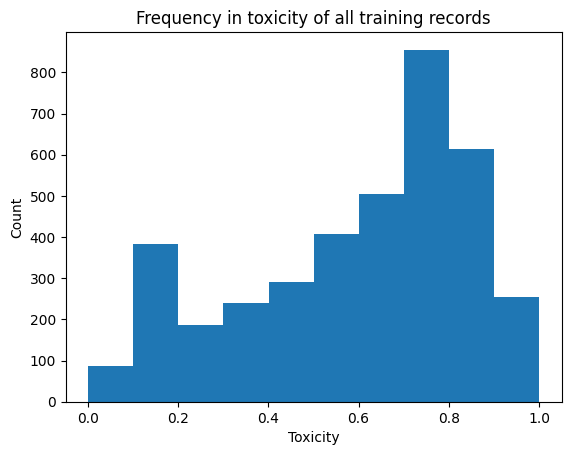

In [ ]:
data = train_df.select(col('toxicity').cast('float')).rdd.flatMap(lambda x: x).collect()

plt.hist(data, bins=10)
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Frequency in toxicity of all training records')
plt.show()

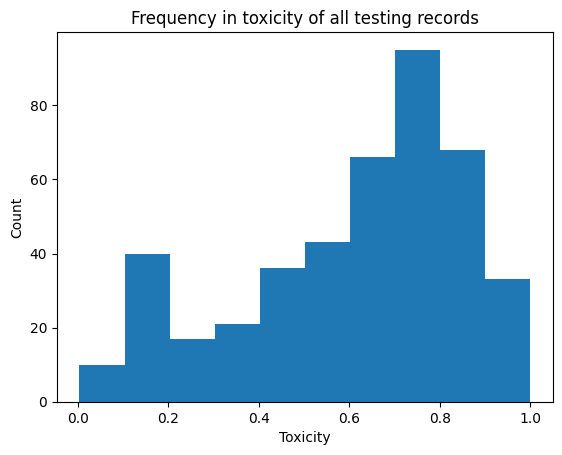

In [ ]:
testdata = test_df.select(col('toxicity').cast('float')).rdd.flatMap(lambda x: x).collect()

plt.hist(testdata, bins=10)
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Frequency in toxicity of all testing records')
plt.show()

# LSTM

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler
from keras.utils import pad_sequences
from gensim.models import KeyedVectors

In [ ]:
#crawl-300d-2M.vec--> https://fasttext.cc/docs/en/english-vectors.html
#When pre-train embedding is helpful? https://www.aclweb.org/anthology/N18-2084
#There are many pretrained word embedding models: 
#fasttext, GloVe, Word2Vec, etc
#crawl-300d-2M.vec is trained from Common Crawl (a website that collects almost everything)
#it has 2 million words. Each word is represent by a vector of 300 dimensions.

#https://nlp.stanford.edu/projects/glove/
#GloVe is similar to crawl-300d-2M.vec. Probably, they use different algorithms.
#glove.840B.300d.zip: Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
#tokens mean words. It has 2.2M different words and 840B (likely duplicated) words in total

#note that these two pre-trained models give 300d vectors.

EMBEDDING_FILES = [
  #  'crawl-300d-2M.gensim',
    'glove.840B.300d.gensim'
]

In [ ]:
NUM_MODELS = 2
BATCH_SIZE = 256  # number of training sample to put in theo model each step
LSTM_UNITS = 64
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
EPOCHS = 8

# we will convert each word in a comment_text to a number.
# So a comment_text is a list of number. How many numbers in this list?
# we want the length of this list is a constant -> MAX_LEN
MAX_LEN = 200

# columns used in training and testing
IDENTITY_COLUMNS = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness'
]
AUX_COLUMNS = ['toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
TEXT_COLUMN = 'comment_text'
TARGET_COLUMN = 'toxicity'
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'


In [ ]:
# convert the rdd to dataframe for training the model for testing
tdf = train_df.toPandas()

tdf[IDENTITY_COLUMNS].astype(float)
tdf[AUX_COLUMNS].astype(float)

# convert the rdd to dataframe for testing the model for testing
testingdf = test_df.toPandas()

testingdf[IDENTITY_COLUMNS].astype(float)
testingdf[AUX_COLUMNS].astype(float)

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat
0,0.373134,0.044776,0.089552,0.000000,0.343284,0.014925
1,0.605263,0.013158,0.065789,0.092105,0.565789,0.065789
2,0.666667,0.015873,0.031746,0.047619,0.666667,0.000000
3,0.550000,0.037500,0.337500,0.037500,0.487500,0.000000
4,0.192982,0.000000,0.000000,0.000000,0.035088,0.070175
...,...,...,...,...,...,...
3817,0.800000,0.000000,0.000000,0.100000,0.800000,0.000000
3818,0.900000,0.000000,0.600000,0.100000,0.900000,0.000000
3819,0.525000,0.000000,0.025000,0.000000,0.475000,0.000000
3820,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [ ]:
# code for matrix embedding and LSTM model 

def build_matrix(word_index, path):
    embedding_index = KeyedVectors.load(path, mmap='r')
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        for candidate in [word, word.lower()]:
            if candidate in embedding_index:
                embedding_matrix[i] = embedding_index[candidate]
                break
    return embedding_matrix
    

def build_model(embedding_matrix, num_aux_targets):
    # a simpler version can be found here
    # https://www.tensorflow.org/tutorials/keras/text_classification

    words = Input(shape=(None,))
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)

    #here the author used pre-train embedding matrix.
    #instead of train from begining like in tensorflow example
    #https://stackoverflow.com/questions/50393666/how-to-understand-spatialdropout1d-and-when-to-use-it

    x = SpatialDropout1D(0.2)(x)
    #x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    #x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    # changed the CuDNNLSTM to LSTM as CuDNNLSTM was not supported
    x = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True))(x)

    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='relu')(hidden)
    aux_result = Dense(num_aux_targets, activation='relu')(hidden)
    
    model = Model(inputs=words, outputs=[result, aux_result])

    #model.summary() will gives a good view of the model structure

    model.compile(loss='categorical_crossentropy', optimizer='adam')    

    return model

In [ ]:
train_df = tdf
test_df = testingdf

In [ ]:
# making sure that the datatype is same after converting the rdd to df

train_df['male'] = train_df['male'].astype('float64')
train_df['female'] = train_df['female'].astype('float64')
train_df['homosexual_gay_or_lesbian'] = train_df['homosexual_gay_or_lesbian'].astype('float64')
train_df['christian'] = train_df['christian'].astype('float64')
train_df['jewish'] = train_df['jewish'].astype('float64')
train_df['muslim'] = train_df['muslim'].astype('float64')
train_df['toxicity'] = train_df['toxicity'].astype('float64')
train_df['severe_toxicity'] = train_df['severe_toxicity'].astype('float64')
train_df['obscene'] = train_df['obscene'].astype('float64')
train_df['identity_attack'] = train_df['identity_attack'].astype('float64')
train_df['insult'] = train_df['insult'].astype('float64')
train_df['threat'] = train_df['threat'].astype('float64')
train_df['sexual_explicit'] = train_df['sexual_explicit'].astype('float64')
train_df['bisexual'] = train_df['bisexual'].astype('float64')
train_df['other_sexual_orientation'] = train_df['other_sexual_orientation'].astype('float64')
train_df['transgender'] = train_df['transgender'].astype('float64')
train_df['other_gender'] = train_df['other_gender'].astype('float64')
train_df['heterosexual'] = train_df['heterosexual'].astype('float64')
train_df['hindu'] = train_df['hindu'].astype('float64')

train_df['buddhist'] = train_df['buddhist'].astype('float64')
train_df['atheist'] = train_df['atheist'].astype('float64')
train_df['black'] = train_df['black'].astype('float64')
train_df['white'] = train_df['white'].astype('float64')
train_df['asian'] = train_df['asian'].astype('float64')
train_df['psychiatric_or_mental_illness'] = train_df['psychiatric_or_mental_illness'].astype('float64')


train_df['funny'] = train_df['funny'].astype('int')
train_df['wow'] = train_df['wow'].astype('int')
train_df['sad'] = train_df['sad'].astype('int')
train_df['likes'] = train_df['likes'].astype('int')
train_df['disagree'] = train_df['disagree'].astype('int')

In [ ]:
# getting the dependent and independent variables.

x_train = train_df[TEXT_COLUMN].astype(str)
y_train = train_df[TARGET_COLUMN].values
y_aux_train = train_df[AUX_COLUMNS].values
x_test = test_df[TEXT_COLUMN].astype(str)

In [ ]:
train_df['toxicity'].describe()

count    3822.000000
mean        0.601960
std         0.258405
min         0.000725
25%         0.420290
50%         0.666667
75%         0.800000
max         1.000000
Name: toxicity, dtype: float64

In [ ]:
print(train_df.dtypes)

id                                      object
comment_text                            object
split                                   object
created_date                            object
publication_id                          object
parent_id                               object
article_id                              object
rating                                  object
funny                                    int64
wow                                      int64
sad                                      int64
likes                                    int64
disagree                                 int64
toxicity                               float64
severe_toxicity                        float64
obscene                                float64
sexual_explicit                        float64
identity_attack                        float64
insult                                 float64
threat                                 float64
male                                   float64
female       

In [ ]:
# getting the sample weights using the 

for column in IDENTITY_COLUMNS + [TARGET_COLUMN]:
    #print(column)
    #print(train_df[column])
    train_df[column] = np.where(train_df[column] >= 0.5, True, False)

tokenizer = text.Tokenizer(filters=CHARS_TO_REMOVE, lower=False)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# each comment_text is now a list of word
# we want the length of this list is a constant -> MAX_LEN
# if the list is longer, then we cut/trim it 
# if shorter, then we add/pad it with 0's at the beginning

x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)

sample_weights = np.ones(len(x_train), dtype=np.float32)
sample_weights += train_df[IDENTITY_COLUMNS].sum(axis=1)
sample_weights += train_df[TARGET_COLUMN] * (~train_df[IDENTITY_COLUMNS]).sum(axis=1)
sample_weights += (~train_df[TARGET_COLUMN]) * train_df[IDENTITY_COLUMNS].sum(axis=1) * 5
sample_weights /= sample_weights.mean()

embedding_matrix = np.concatenate(
    [build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)

checkpoint_predictions = []
weights = []

In [ ]:
# training the model
for model_idx in range(NUM_MODELS):
    model = build_model(embedding_matrix, y_aux_train.shape[-1])
    for global_epoch in range(EPOCHS):
        model.fit(
            x_train,
            [y_train, y_aux_train],
            batch_size=BATCH_SIZE,
            epochs=2,
            verbose=2,
            sample_weight=[sample_weights.values, np.ones_like(sample_weights)]
        )
        checkpoint_predictions.append(model.predict(x_test, batch_size=2048)[0].flatten())
        weights.append(2 ** global_epoch)

Epoch 1/2
8/8 - 125s - loss: 1.0871 - dense_2_loss: 0.6109 - dense_3_loss: 0.4761 - 125s/epoch - 16s/step
Epoch 2/2
8/8 - 103s - loss: 0.9592 - dense_2_loss: 0.5852 - dense_3_loss: 0.3740 - 103s/epoch - 13s/step
1/1 [==============================] - 7s 7s/step
Epoch 1/2
8/8 - 100s - loss: 0.9437 - dense_2_loss: 0.5819 - dense_3_loss: 0.3618 - 100s/epoch - 12s/step
Epoch 2/2
8/8 - 98s - loss: 0.9374 - dense_2_loss: 0.5804 - dense_3_loss: 0.3570 - 98s/epoch - 12s/step
1/1 [==============================] - 4s 4s/step
Epoch 1/2
8/8 - 108s - loss: 0.9302 - dense_2_loss: 0.5786 - dense_3_loss: 0.3516 - 108s/epoch - 13s/step
Epoch 2/2
8/8 - 107s - loss: 0.9227 - dense_2_loss: 0.5770 - dense_3_loss: 0.3457 - 107s/epoch - 13s/step
1/1 [==============================] - 4s 4s/step
Epoch 1/2
8/8 - 96s - loss: 0.9171 - dense_2_loss: 0.5756 - dense_3_loss: 0.3415 - 96s/epoch - 12s/step
Epoch 2/2
8/8 - 98s - loss: 0.9158 - dense_2_loss: 0.5774 - dense_3_loss: 0.3384 - 98s/epoch - 12s/step
1/1 [===

In [ ]:
# saving the result in a csv file

predictions = np.average(checkpoint_predictions, weights=weights, axis=0)

results = pd.DataFrame.from_dict({
    'id': test_df.id,
    'text': test_df.comment_text,
    'prediction': predictions,
    'original': test_df.toxicity
})



results.to_csv('results.csv', index=False)